In [1]:
import pandas as pd

In [26]:
df = pd.read_csv("./python_codes/sg_zipcode_mapper.csv", encoding='ISO-8859-1')
df.head()

,postal,latitude,longtitude,searchval,blk_no,road_name,building,address,postal.1
0,398614,1.312763,103.883519,# 1 LOFT,1,LORONG 24 GEYLANG,# 1 LOFT,1 LORONG 24 GEYLANG # 1 LOFT SINGAPORE 398614,398614
1,398721,1.312390,103.881504,# 1 SUITES,1,LORONG 20 GEYLANG,# 1 SUITES,1 LORONG 20 GEYLANG # 1 SUITES SINGAPORE 398721,398721
2,629875,1.309135,103.679463,1 BENOI ROAD SINGAPORE 629875,1,BENOI ROAD,NIL,1 BENOI ROAD SINGAPORE 629875,629875
3,439731,1.305466,103.895674,1 BOSCOMBE ROAD SINGAPORE 439731,1,BOSCOMBE ROAD,NIL,1 BOSCOMBE ROAD SINGAPORE 439731,439731
4,659592,1.344619,103.749789,1 BUKIT BATOK STREET 22 SINGAPORE 659592,1,BUKIT BATOK STREET 22,NIL,1 BUKIT BATOK STREET 22 SINGAPORE 659592,659592


In [27]:
def get_postal_sector(postal):
    postal = str(postal)
    if len(postal) == 6:
        return postal[:2]
    elif len(postal) == 5:
        return '0' + postal[:1]


df['postal_sector'] = df['postal'].apply(get_postal_sector)
df.head()

,postal,latitude,longtitude,searchval,blk_no,road_name,building,address,postal.1,postal_sector
0,398614,1.312763,103.883519,# 1 LOFT,1,LORONG 24 GEYLANG,# 1 LOFT,1 LORONG 24 GEYLANG # 1 LOFT SINGAPORE 398614,398614,39
1,398721,1.312390,103.881504,# 1 SUITES,1,LORONG 20 GEYLANG,# 1 SUITES,1 LORONG 20 GEYLANG # 1 SUITES SINGAPORE 398721,398721,39
2,629875,1.309135,103.679463,1 BENOI ROAD SINGAPORE 629875,1,BENOI ROAD,NIL,1 BENOI ROAD SINGAPORE 629875,629875,62
3,439731,1.305466,103.895674,1 BOSCOMBE ROAD SINGAPORE 439731,1,BOSCOMBE ROAD,NIL,1 BOSCOMBE ROAD SINGAPORE 439731,439731,43
4,659592,1.344619,103.749789,1 BUKIT BATOK STREET 22 SINGAPORE 659592,1,BUKIT BATOK STREET 22,NIL,1 BUKIT BATOK STREET 22 SINGAPORE 659592,659592,65


In [28]:
df.style.set_properties(subset=['text'], **{'width': '700px'})


postal_df = pd.read_json("./python_codes/singapore_postals.json")
print(postal_df.iloc[1].postals)

{'id': '02', 'district': '02', 'sectors': ['07', '08'], 'locations': ['Anson', 'Tanjong Pagar']}


In [29]:
postal_mapping = []
for entry in postal_df['postals']:
    district = entry['district']
    for sector in entry['sectors']:
        postal_mapping.append({'postal_sector': sector, 'postal_district': district})

# Convert to DataFrame
postal_mapping_df = pd.DataFrame(postal_mapping)
postal_mapping_df

,postal_sector,postal_district
0,01,01
1,02,01
2,03,01
3,04,01
4,05,01


In [30]:
df = df.merge(postal_mapping_df, on='postal_sector', how='left')
df.head()

,postal,latitude,longtitude,searchval,blk_no,road_name,building,address,postal.1,postal_sector,postal_district
0,398614,1.312763,103.883519,# 1 LOFT,1,LORONG 24 GEYLANG,# 1 LOFT,1 LORONG 24 GEYLANG # 1 LOFT SINGAPORE 398614,398614,39,14
1,398721,1.312390,103.881504,# 1 SUITES,1,LORONG 20 GEYLANG,# 1 SUITES,1 LORONG 20 GEYLANG # 1 SUITES SINGAPORE 398721,398721,39,14
2,629875,1.309135,103.679463,1 BENOI ROAD SINGAPORE 629875,1,BENOI ROAD,NIL,1 BENOI ROAD SINGAPORE 629875,629875,62,22
3,439731,1.305466,103.895674,1 BOSCOMBE ROAD SINGAPORE 439731,1,BOSCOMBE ROAD,NIL,1 BOSCOMBE ROAD SINGAPORE 439731,439731,43,15
4,659592,1.344619,103.749789,1 BUKIT BATOK STREET 22 SINGAPORE 659592,1,BUKIT BATOK STREET 22,NIL,1 BUKIT BATOK STREET 22 SINGAPORE 659592,659592,65,22


In [31]:
df.postal_district.value_counts()

postal_district
19    3516
22    3459
15    1712
10    1531
16    1389
20    1307
27    1278
14    1021
05     971
25     948
11     734
28     719
12     670
03     623
21     610
13     580
09     510
26     368
04     336
17     336
08     261
01     235
02     213
07     210
06      38
24       5
Name: count, dtype: int64

In [32]:
import folium

singapore_coords = [1.3521, 103.8198]
map_singapore = folium.Map(location=singapore_coords, zoom_start=12)

for _, row in df.iterrows():
    if pd.notnull(row['latitude']) and pd.notnull(row['longtitude']):
        folium.Marker(
            location=[row['latitude'], row['longtitude']],
            popup=f"Postal: {row['postal']}",
        ).add_to(map_singapore)

map_singapore.save('singapore_map.html')

In [33]:
# !pip install folium

In [34]:
# Initialize the map centered on Singapore
singapore_coords = [1.3521, 103.8198]
map_singapore = folium.Map(location=singapore_coords, zoom_start=12)

In [35]:
from shapely.geometry import MultiPoint, Polygon


for area, group in df.groupby('postal_district'):
    points = list(zip(group['latitude'], group['longtitude']))
    
    # Calculate convex hull using Shapely
    polygon = MultiPoint(points).convex_hull  # Convex hull as a polygon
    boundary_coords = [[point[0], point[1]] for point in polygon.exterior.coords]  # Extract boundary points

    # Add the polygon to the map
    folium.Polygon(
        locations=boundary_coords,  # List of [lat, lon] pairs
        color="blue",  # Boundary line color
        weight=2,      # Line weight
        fill=True,     # Fill the polygon
        fill_color="cyan",  # Fill color
        fill_opacity=0.4,   # Fill opacity
        popup=f"Postal District: {area}"  # Popup to show the planning area
    ).add_to(map_singapore)

# Add markers for all points
for _, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longtitude']],
        popup=f"Postal District: {row['postal_district']}",
    ).add_to(map_singapore)

# Save the map to an HTML file
map_singapore.save('singapore_map_with_planning_areas.html')

/var/folders/90/q7dj_p6j3gx0cls87s3y0myc0000gq/T/ipykernel_79520/731601544.py:45: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('singapore_map_with_districts.png', dpi=300)
/Users/daaa/opt/miniconda3/envs/it3386/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


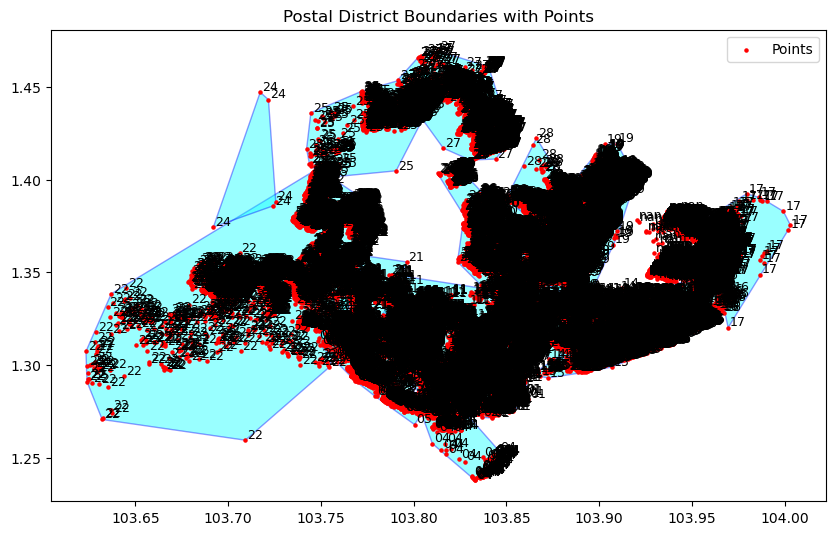

In [36]:
import geopandas as gpd
from shapely.geometry import Point, MultiPoint


geometry = [Point(xy) for xy in zip(df['longtitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Set the coordinate reference system (CRS)
gdf.set_crs("EPSG:4326", inplace=True)


import matplotlib.pyplot as plt

# Create a GeoDataFrame to store convex hulls for each postal district
hulls = []
for area, group in df.groupby('postal_district'):
    points = [Point(xy) for xy in zip(group['longtitude'], group['latitude'])]
    polygon = MultiPoint(points).convex_hull  # Calculate convex hull
    hulls.append({'postal_district': area, 'geometry': polygon})

# Convert hulls to a GeoDataFrame
gdf_hulls = gpd.GeoDataFrame(hulls, geometry='geometry')
gdf_hulls.set_crs("EPSG:4326", inplace=True)

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the boundaries (convex hulls)
gdf_hulls.plot(ax=ax, color='cyan', alpha=0.4, edgecolor='blue')

# Plot the points (latitude and longitude) on top of the boundaries
gdf.plot(ax=ax, color='red', markersize=5, label='Points')

# Add labels (postal district names)
for _, row in gdf.iterrows():
    ax.text(row['longtitude'] + 0.001, row['latitude'] + 0.001, row['postal_district'], fontsize=9)

# Add a legend
plt.legend()

# Title
plt.title("Postal District Boundaries with Points")

# Save the plot as an image
plt.savefig('singapore_map_with_districts.png', dpi=300)
plt.show()

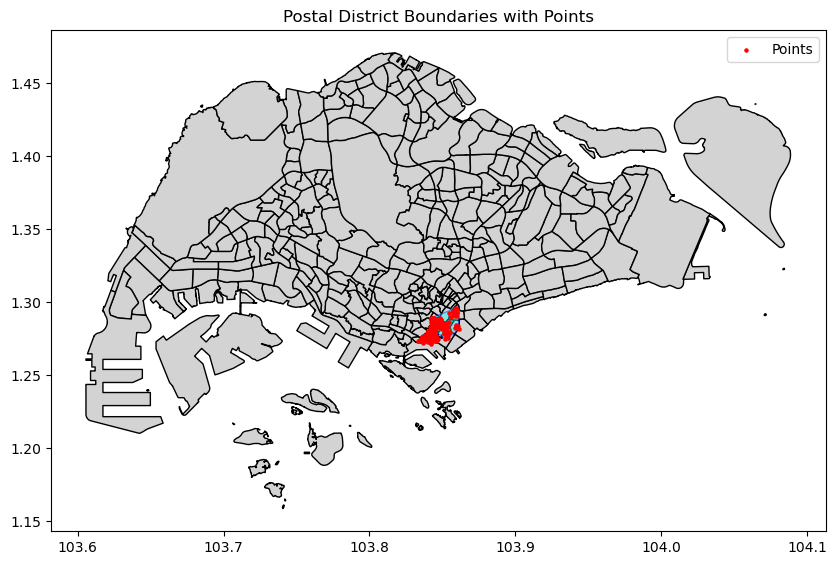

In [64]:
# Load the Singapore map from GeoJSON file (replace with your actual file path)
singapore_map = gpd.read_file('./python_codes/MasterPlan2019SubzoneBoundaryNoSeaGEOJSON.geojson')

tdf = df[df['postal_district'].isin(['01','02'])]

# Convert the DataFrame into GeoDataFrame
geometry = [Point(xy) for xy in zip(tdf['longtitude'], tdf['latitude'])]
gdf = gpd.GeoDataFrame(tdf, geometry=geometry)

# Set the coordinate reference system (CRS)
gdf.set_crs("EPSG:4326", inplace=True)

# Create a GeoDataFrame to store convex hulls for each postal district
hulls = []
for area, group in tdf.groupby('postal_district'):
    points = [Point(xy) for xy in zip(group['longtitude'], group['latitude'])]
    polygon = MultiPoint(points).convex_hull  # Calculate convex hull
    hulls.append({'postal_district': area, 'geometry': polygon})

# Convert hulls to a GeoDataFrame
gdf_hulls = gpd.GeoDataFrame(hulls, geometry='geometry')
gdf_hulls.set_crs("EPSG:4326", inplace=True)

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the Singapore map (GeoJSON) as background
singapore_map.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot the boundaries (convex hulls)
gdf_hulls.plot(ax=ax, color='cyan', alpha=0.4, edgecolor='blue')

# Plot the points (latitude and longitude) on top of the boundaries
gdf.plot(ax=ax, color='red', markersize=5, label='Points')

# Add labels (postal district names)
# for _, row in gdf.iterrows():
#     ax.text(row['longtitude'] + 0.001, row['latitude'] + 0.001, row['postal_district'], fontsize=9)

# Add a legend
plt.legend()

# Title
plt.title("Postal District Boundaries with Points")

# Save the plot as an image
plt.savefig('singapore_map_with_districts.png', dpi=300)
plt.show()

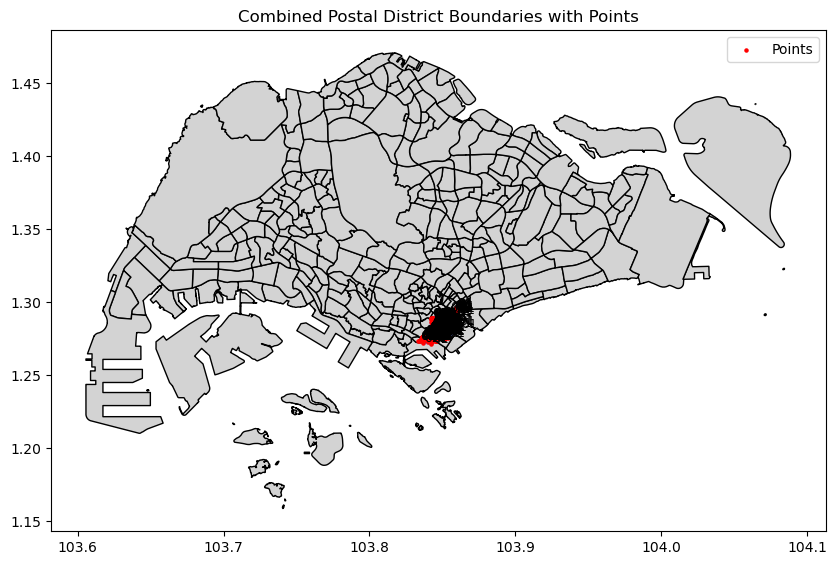

In [65]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point, MultiPoint, Polygon
import matplotlib.pyplot as plt

# Load the Singapore map from GeoJSON file (replace with your actual file path)
singapore_map = gpd.read_file('./python_codes/MasterPlan2019SubzoneBoundaryNoSeaGEOJSON.geojson')

# Filter the dataframe to only include the desired postal districts
tdf = df[df['postal_district'].isin(['01', '02'])]

# Convert the DataFrame into GeoDataFrame
geometry = [Point(xy) for xy in zip(tdf['longtitude'], tdf['latitude'])]
gdf = gpd.GeoDataFrame(tdf, geometry=geometry)

# Set the coordinate reference system (CRS)
gdf.set_crs("EPSG:4326", inplace=True)

# Create a GeoDataFrame to store combined polygons for each postal district
district_polygons = []

for area, group in tdf.groupby('postal_district'):
    points = [Point(xy) for xy in zip(group['longtitude'], group['latitude'])]
    # Create convex hull for each group of points in a postal district
    hull = MultiPoint(points).convex_hull
    district_polygons.append({'postal_district': area, 'geometry': hull})

# Convert the list of polygons to a GeoDataFrame
gdf_districts = gpd.GeoDataFrame(district_polygons, geometry='geometry')
gdf_districts.set_crs("EPSG:4326", inplace=True)

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the Singapore map (GeoJSON) as background
singapore_map.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot the combined polygons for postal districts
gdf_districts.plot(ax=ax, color='cyan', alpha=0.4, edgecolor='blue')

# Plot the points (latitude and longitude) on top of the boundaries
gdf.plot(ax=ax, color='red', markersize=5, label='Points')

# Add labels with postal district numbers
for _, row in gdf.iterrows():
    ax.text(row['longtitude'] + 0.001, row['latitude'] + 0.001, row['postal_district'], fontsize=9)

# Add a legend
plt.legend()

# Title
plt.title("Combined Postal District Boundaries with Points")

# Save the plot as an image
plt.savefig('singapore_map_with_combined_districts.png', dpi=300)
plt.show()

# Optionally, save the updated GeoDataFrame as a new GeoJSON file
gdf_districts.to_file("combined_postal_districts.geojson", driver="GeoJSON")


In [90]:
file_path = './python_codes/MasterPlan2019SubzoneBoundaryNoSeaGEOJSON.geojson'
singapore_map = gpd.read_file(file_path)

properties = singapore_map.columns
properties

Index(['Name', 'Description', 'geometry'], dtype='object')

In [116]:
df.style.set_properties(subset=['text'], **{'width': '700px'})


postal_df = pd.read_json("./python_codes/singapore_postals.json")
print(postal_df.iloc[1].postals)

postal_mapping = []
for entry in postal_df['postals']:
    district = entry['district']
    location = entry['locations']
    for sector in entry['sectors']:
        postal_mapping.append({'postal_sector': sector, 'postal_district': district, 'locations': location})

postal_mapping_df = pd.DataFrame(postal_mapping)
postal_mapping_df.head()

{'id': '02', 'district': '02', 'sectors': ['07', '08'], 'locations': ['Anson', 'Tanjong Pagar']}


,postal_sector,postal_district,locations
0,01,01,"[Raffles Place, Cecil, Marina, People’s Park]"
1,02,01,"[Raffles Place, Cecil, Marina, People’s Park]"
2,03,01,"[Raffles Place, Cecil, Marina, People’s Park]"
3,04,01,"[Raffles Place, Cecil, Marina, People’s Park]"
4,05,01,"[Raffles Place, Cecil, Marina, People’s Park]"


In [117]:
location_to_district = {}
for idx, entry in postal_mapping_df.iterrows():
    for location in entry["locations"]:
        location_to_district[location] = entry["postal_district"]

# Assign postal districts based on locations
singapore_map["postal_district"] = singapore_map["Description"].apply(
    lambda desc: next((location_to_district[loc] for loc in location_to_district if loc in desc), None)
)

print(singapore_map)

# Merge geometries by postal district
merged_geo_data = (
    singapore_map.dissolve(by="postal_district", as_index=False)  # Group by postal_district and merge geometries
    .dropna(subset=["postal_district"])  # Remove rows without a postal district
)

# Save the result as a new GeoJSON
output_path = "merged_geojson_file.geojson"
merged_geo_data.to_file(output_path, driver="GeoJSON")

print(f"Merged GeoJSON saved to {output_path}")

KeyError: 'Description'

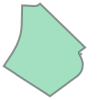

In [125]:
from bs4 import BeautifulSoup


singapore_map.iloc[10, 1]

In [126]:
singapore_map

,Name,geometry,postal_district,parsed_data,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D
0,kml_1,"POLYGON Z ((103.81 1.2824 0, 103.82 1.2804 0, ...",None,"{'SUBZONE_NO': '12', 'SUBZONE_N': 'DEPOT ROAD'...",12,DEPOT ROAD,BMSZ12,N,BUKIT MERAH,BM,CENTRAL REGION,CR,C22DED671DE2A940,20191223152313
1,kml_2,"POLYGON Z ((103.82 1.2805 0, 103.82 1.2801 0, ...",None,"{'SUBZONE_NO': '2', 'SUBZONE_N': 'BUKIT MERAH'...",2,BUKIT MERAH,BMSZ02,N,BUKIT MERAH,BM,CENTRAL REGION,CR,085EF219A5A1AEAD,20191223152313
2,kml_3,"POLYGON Z ((103.84 1.2851 0, 103.84 1.2849 0, ...",None,"{'SUBZONE_NO': '3', 'SUBZONE_N': 'CHINATOWN', ...",3,CHINATOWN,OTSZ03,Y,OUTRAM,OT,CENTRAL REGION,CR,EF2B9A91AF49E025,20191223152313
3,kml_4,"POLYGON Z ((103.85 1.2841 0, 103.85 1.2839 0, ...",None,"{'SUBZONE_NO': '4', 'SUBZONE_N': 'PHILLIP', 'S...",4,PHILLIP,DTSZ04,Y,DOWNTOWN CORE,DT,CENTRAL REGION,CR,615D4EDDEF809F8E,20191223152313
4,kml_5,"POLYGON Z ((103.85 1.2862 0, 103.85 1.2862 0, ...",None,"{'SUBZONE_NO': '5', 'SUBZONE_N': 'RAFFLES PLAC...",5,RAFFLES PLACE,DTSZ05,Y,DOWNTOWN CORE,DT,CENTRAL REGION,CR,72107B11807074F4,20191223152313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,kml_328,"POLYGON Z ((103.84 1.3632 0, 103.84 1.3626 0, ...",None,"{'SUBZONE_NO': '1', 'SUBZONE_N': 'UPPER THOMSO...",1,UPPER THOMSON,BSSZ01,N,BISHAN,BS,CENTRAL REGION,CR,716DA27F6666AB0C,20191223152313
328,kml_329,"POLYGON Z ((103.84 1.3709 0, 103.84 1.3709 0, ...",None,"{'SUBZONE_NO': '5', 'SUBZONE_N': 'SHANGRI-LA',...",5,SHANGRI-LA,AMSZ05,N,ANG MO KIO,AM,NORTH-EAST REGION,NER,9FA8567B39D8D9D7,20191223152313
329,kml_330,"POLYGON Z ((103.85 1.3688 0, 103.85 1.3688 0, ...",None,"{'SUBZONE_NO': '4', 'SUBZONE_N': 'TOWNSVILLE',...",4,TOWNSVILLE,AMSZ04,N,ANG MO KIO,AM,NORTH-EAST REGION,NER,F5558D84EBC2AAA7,20191223152313
330,kml_331,"POLYGON Z ((103.85 1.3452 0, 103.85 1.345 0, 1...",None,"{'SUBZONE_NO': '2', 'SUBZONE_N': 'MARYMOUNT', ...",2,MARYMOUNT,BSSZ02,N,BISHAN,BS,CENTRAL REGION,CR,154AA8659ADDE6D7,20191223152313


In [115]:
def parse_html(html):
    soup = BeautifulSoup(html, 'html.parser')
    table = soup.find('table')
    data_dict = {}
    if table:
        rows = table.find_all('tr')
        for row in rows[1:]:  # Skip the header row
            columns = row.find_all(['th', 'td'])
            if len(columns) == 2:
                key = columns[0].get_text(strip=True)
                value = columns[1].get_text(strip=True)
                data_dict[key] = value
    return data_dict


singapore_map['parsed_data'] = singapore_map['Description'].apply(parse_html)

# Expand the parsed data into individual columns
parsed_df = pd.json_normalize(singapore_map['parsed_data'])
singapore_map = pd.concat([singapore_map, parsed_df], axis=1)

# Drop the original HTML column if no longer needed
singapore_map = singapore_map.drop(columns=['Description'])

KeyError: 'Description'